In [1]:
from ROOT import TCanvas, TPad, TFile, TPaveText, TChain, TCut, TF1, TH1F, TH2F, TCutG, TText, TLatex, TLine
from ROOT import gBenchmark, gStyle, gROOT

In [2]:
import rootnotes
from numpy import *
import scipy
import pylab
import matplotlib.pyplot as plt # plotting libraries from matlab
from scipy.stats import multivariate_normal
from dateutil import parser
from matplotlib import pyplot as plt
import matplotlib.dates as md

In [3]:
%pylab inline  
#always do this for plotting...  don't ask why
#now set the size of figures to display in window
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # set size of figures

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [4]:
import sys
sys.path.insert(2, '//global/project/projectdirs/lux/data')
import aLib

In [6]:
g1=0.1167
g2=12.05

g1=0.1167
g2=15

g1DD=g1*0.982
g2DD=g2*0.954

<h1> 2D Normal fitting  </h1>

In [7]:
import scipy.optimize as opt
import numpy as np

def twoD_Gaussian((x, y), amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                            + c*((y-yo)**2)))
    return g.ravel()

In [8]:
#c1 = rootnotes.default_canvas(size=(400,300)) # use TCanvas
#c1.SetGridx()
#c1.SetGridy()

<h1> Load in all the LUX Run03 WIMP Search Data </h1>

In [10]:
'''
chain6 = TChain('golden')
chain5.Add('/project/projectdirs/lux/data/golden/Golden_CH3T_*.root')

chain5 = TChain('golden')
chain4.Add('/project/projectdirs/lux/data/golden/Golden_DD_*.root')

chain4 = TChain('golden')
chain3.Add('/project/projectdirs/lux/data/golden/Golden_Cs137_Aug.root')

chain3 = TChain('golden')
chain2.Add('/project/projectdirs/lux/data/golden/Golden_XeAct/*.root')

chain2 = TChain('golden')
chain.Add('/project/projectdirs/lux/users/acurrie/Run3_DP2.0/*.root')

chain = TChain('golden')
chain.Add('/project/projectdirs/lux/data/golden/Golden_Run04/*.root')

'''

chain = TChain('golden')
chain.Add('/project/projectdirs/lux/data/golden/Run04_Cs.root')

1

<h1> Define the S1 and S2 cuts to seperate the islands of energy (see later plots) </h1>

In [9]:
Energies=[2.8]
NamesE=["2.8 keV, 5.2 keV X-ray, 41.55 keV"]
cutsE=array([[1.8, 3.5],
           [3.8,6.5],[35,50]])


mean_s2=zeros(len(Energies))
mean_s2_sig=zeros(len(Energies))
mean_s1=zeros(len(Energies))
mean_s1_sig=zeros(len(Energies))

<h1> 2.8 and 5.2 keV lines in the WS data </h1>

<h3> First plot the WS data, with 3 sigma ER band as per the tiritum calibration </h3>

In [118]:
c1.Clear()

In [119]:
c1 = rootnotes.default_canvas(name='icanvas7', size=(800, 600))

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: density_plt_hst (Potential memory leak).


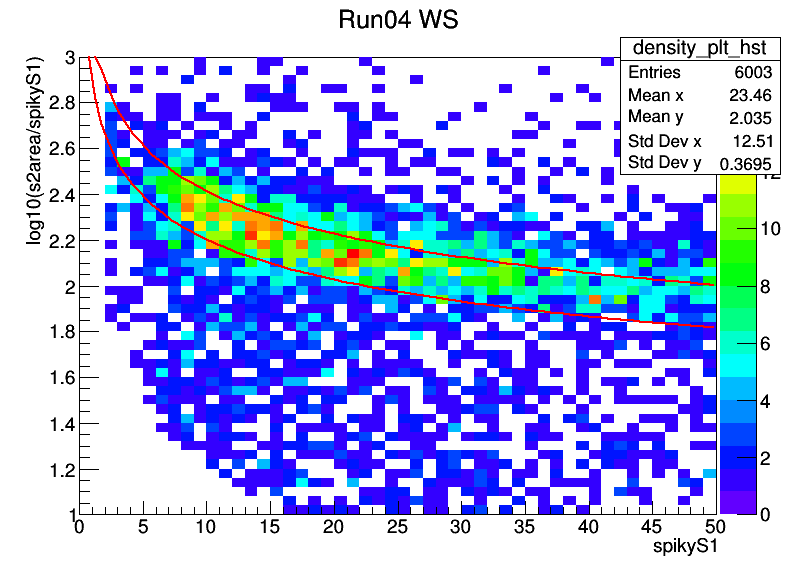

In [122]:
#95% ER bounds from tritium

au = 3.15  #use 3.10 for 2 sigma bounds #90% 3.007
bu = -0.1158 
    
al = 2.9; # use 2.592 #90% 2.682
bl =-0.1197;

er_cut_l=TCut('log10(s2area/spikyS1)>{:g}*spikyS1^{:g}'.format(al,bl))
er_cut_u=TCut('log10(s2area/spikyS1)<{:g}*spikyS1^{:g}'.format(au,bu))


fid_vol=TCut('drift>30 && drift<90 && radius<20 && luxstamp/10**15>12.5')
area_cut=TCut('spikyS1>0 && s1area<100 && spikyS1<100 && s2area_raw>150 && s2area>100 && s2area<10**5')
bad_area_cut=TCut('((goodArea<=630 && badArea < 80) || (goodArea>630 && badArea < 80+0.095*(goodArea-630)))')
combined_cut=TCut(fid_vol.GetTitle() + '&&'+ area_cut.GetTitle() + '&&' + bad_area_cut.GetTitle()); # + '&&' + er_cut_l.GetTitle() + '&&' + er_cut_u.GetTitle() 

density_plt_hst=TH2F('density_plt_hst','Run04 WS;spikyS1;log10(s2area/spikyS1)',50,0,50,50,1,3)
#density_plt_hst=TH2F('density_plt_hst','Run04 WS;spikyS1;s2area)',30,0,50,30,800,5000)

#chain2.SetMarkerStyle(6)
#chain2.SetMarkerSize(10)
n=chain.Draw('log10(s2area/spikyS1):spikyS1>>density_plt_hst',combined_cut,'colz') # WS is chain, chain2 is XeAct, chain3 is Cs137, 4 is DD
#n=chain.Draw('s2area:spikyS1>>density_plt_hst',combined_cut,'colz') # WS is chain, chain2 is XeAct, chain3 is Cs137, 4 is DD



fun1 = TF1( 'fun1', '{:g}*x^{:g}'.format(al,bl), 0, 50)
fun2 = TF1( 'fun1', '{:g}*x^{:g}'.format(au,bu), 0, 50)
fun1.Draw('Same')
fun2.Draw('Same')

c1

<h1> Make a cut around 10 hours of each Kr83 calibration </h1>

In [12]:
Kr_files=array([['lux10_20130422T2031'],
       ['lux10_20130424T1406'],
       ['lux10_20130424T1740'],
       ['lux10_20130425T1047'],
       ['lux10_20130426T0951'],
       ['lux10_20130426T1019'],
       ['lux10_20130429T1433'],
       ['lux10_20130429T1447'],
       ['lux10_20130501T1508'],
       ['lux10_20130503T1457'],
       ['lux10_20130506T1328'],
       ['lux10_20130510T1250'],
       ['lux10_20130510T1607'],
       ['lux10_20130510T2008'],
       ['lux10_20130511T0014'],
       ['lux10_20130513T1438'],
       ['lux10_20130517T1508'],
       ['lux10_20130517T1542'],
       ['lux10_20130517T1810'],
       ['lux10_20130520T1444'],
       ['lux10_20130520T1504'],
       ['lux10_20130520T1742'],
       ['lux10_20130520T1758'],
       ['lux10_20130520T1909'],
       ['lux10_20130524T1503'],
       ['lux10_20130524T1537'],
       ['lux10_20130524T1829'],
       ['lux10_20130528T1304'],
       ['lux10_20130528T1546'],
       ['lux10_20130529T1517'],
       ['lux10_20130529T1547'],
       ['lux10_20130529T2003'],
       ['lux10_20130531T1403'],
       ['lux10_20130531T1421'],
       ['lux10_20130604T1421'],
       ['lux10_20130604T1737'],
       ['lux10_20130604T2137'],
       ['lux10_20130604T2334'],
       ['lux10_20130607T1512'],
       ['lux10_20130610T1518'],
       ['lux10_20130614T1623'],
       ['lux10_20130617T1457'],
       ['lux10_20130621T1533'],
       ['lux10_20130626T1028'],
       ['lux10_20130626T1517'],
       ['lux10_20130628T1444'],
       ['lux10_20130701T1451'],
       ['lux10_20130701T1646'],
       ['lux10_20130701T2257'],
       ['lux10_20130705T1530'],
       ['lux10_20130709T1009'],
       ['lux10_20130709T1811'],
       ['lux10_20130712T1427'],
       ['lux10_20130712T2232'],
       ['lux10_20130717T1424'],
       ['lux10_20130717T2212'],
       ['lux10_20130720T1045'],
       ['lux10_20130720T1908'],
       ['lux10_20130723T1452'],
       ['lux10_20130723T2205'],
       ['lux10_20130726T1224'],
       ['lux10_20130726T1431'],
       ['lux10_20130726T1819'],
       ['lux10_20130727T0000'],
       ['lux10_20130729T1004'],
       ['lux10_20130729T1752'],
       ['lux10_20130729T2337'],
       ['lux10_20130807T1035'],
       ['lux10_20130807T1403'],
       ['lux10_20130807T2233'],
       ['lux10_20130812T1530'],
       ['lux10_20130812T1546'],
       ['lux10_20130812T2259'],
       ['lux10_20130813T0652'],
       ['lux10_20130823T0953'],
       ['lux10_20130823T1717'],
       ['lux10_20130823T2119'],
       ['lux10_20130829T1005']
               ])

Kr_file_dates=[]
for ii in range(0,Kr_files.size):
    Kr_file_dates.append(parser.parse(Kr_files[ii,0][6:]))

Kr_file_dates=array(Kr_file_dates)

lux_epoch=md.datestr2num('Jan 1st 2011 at 00:00')
Kr_lux_stamps=(md.date2num(Kr_file_dates)-lux_epoch)*24*3600*10**8

In [13]:
start_delay=1*3600*10**8
end_delay=24*3600*10**8
kr_time_cut_all=TCut('')

for ii in range(0,Kr_lux_stamps.size):
    kr_time_cut=TCut('(luxstamp>{:.0f} && luxstamp<{:.0f})'.format(Kr_lux_stamps[ii]-start_delay,Kr_lux_stamps[ii]+end_delay))
    if ii==0:
        kr_time_cut_all=TCut(kr_time_cut.GetTitle());
    else:
        #kr_time_cut_all=kr_time_cut_all+kr_time_cut
        kr_time_cut_all=TCut(kr_time_cut_all.GetTitle() +'||'+ kr_time_cut.GetTitle());

<h1> Now histogram the ER events at low energy (around 3 sigma as defined by tritium) </h1>

In [125]:
c2.Clear()

In [126]:
c2 = rootnotes.default_canvas(name='icanvas22', size=(800, 600))

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: density_plt_hst (Potential memory leak).


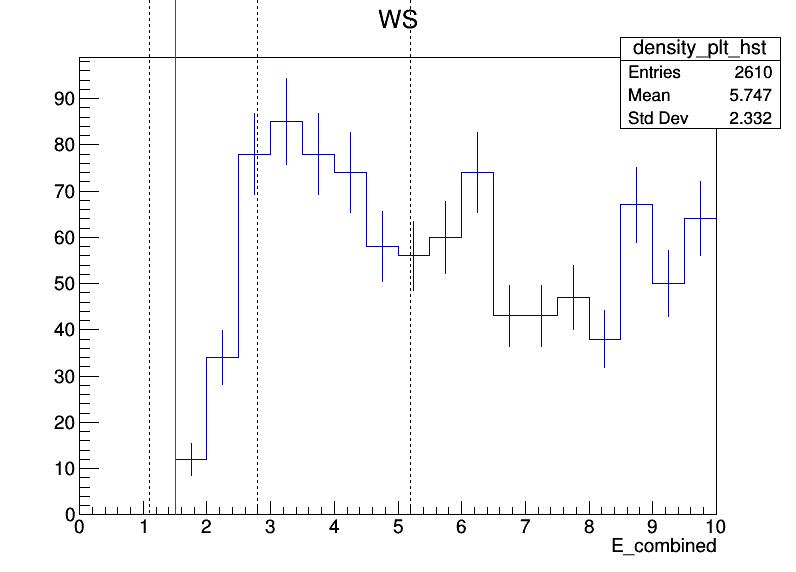

In [137]:
g1=0.11
g2=14.3

au = 3.2 #use 3.10 for 2 sigma bounds #90% 3.007
bu = -0.1158 
    
al = 2.75; # use 2.592 #90% 2.682
bl =-0.1197;

er_cut_l=TCut('log10(s2area/spikyS1)>{:g}*spikyS1^{:g}'.format(al,bl))
er_cut_u=TCut('log10(s2area/spikyS1)<{:g}*spikyS1^{:g}'.format(au,bu))

fid_vol=TCut('drift>30 && drift<90 && radius<23 && luxstamp/10**15<12.5') #add time cut ... 'luxstamp/10**15 ...&& luxstamp/10**15<8.5
area_cut=TCut('spikyS1>0 && spikyS1<150 && s1area<150 && s2area_raw>150 && s2area>100 && s2area<10**6') #spikyS1
bad_area_cut=TCut('((goodArea<=630 && badArea < 80) || (goodArea>630 && badArea < 80+0.095*(goodArea-630)))')
ercut= er_cut_l.GetTitle() + '&&' + er_cut_u.GetTitle()
#energy_cut=TCut('1/73*(spikyS1/{:g}+s2area/{:g})'.format(g1,g2)+'<4 &&1/73*(spikyS1/{:g}+s2area/{:g})'.format(g1,g2)+'>1.5' )
combined_cut=TCut(fid_vol.GetTitle() + '&&'+ area_cut.GetTitle() + '&&' + bad_area_cut.GetTitle() + '&&' + ercut);

density_plt_hst=TH1F('density_plt_hst','WS;E_combined',20,0,10)
n=chain.Draw('1/73*(s1area/{:g}+s2area/{:g})>>density_plt_hst'.format(g1,g2),combined_cut) # WS is chain2 #  Cs is chain3
density_plt_hst.SetOption("EH")

aline=[]
Energies=[1.1,2.8,5.2] 

for ii, En in enumerate(Energies):
    aline.append(TLine(En,0,En,360))
    aline[ii].SetLineStyle(2)
    aline[ii].SetLineColor(1) #black =1
    aline[ii].Draw()

Thresh=TLine(1.5,0,1.5,360)#energy threshold
Thresh.SetLineColor(2)
Thresh.Draw()

amps=[]
means=[]
sigmas=[]
Texts=[]
'''
density_plt_hst.Fit("gaus","","",cutsE[0,0],cutsE[0,1]);
amps.append(density_plt_hst.GetFunction("gaus").GetParameter(0) )
means.append(density_plt_hst.GetFunction("gaus").GetParameter(1) )
sigmas.append(density_plt_hst.GetFunction("gaus").GetParameter(2) )

density_plt_hst.Fit("gaus","","",cutsE[1,0],cutsE[1,1]);
amps.append(density_plt_hst.GetFunction("gaus").GetParameter(0) )
means.append(density_plt_hst.GetFunction("gaus").GetParameter(1) )
sigmas.append(density_plt_hst.GetFunction("gaus").GetParameter(2) )


Fit1=TF1("g1","gauss",cutsE[0,0],cutsE[0,1])
Fit2=TF1("g2","gaus",cutsE[1,0],cutsE[1,1])
#total = TF1("total","gaus(0)+gaus(1)",1,8)
#total.SetLineColor(2)
                   
density_plt_hst.Fit(Fit1,"R");
density_plt_hst.Fit(Fit2,"R+");   
par=Fit1.GetParameters();
par2=Fit2.GetParameters();

par[3]=par2[0]
par[4]=par2[1]
par[5]=par2[2]
#par_tot=array([par[0],par[1],par[2],par2[0],par2[1],par2[2]])

#total.SetParameters(par);
#density_plt_hst.Fit(total,"R+");


amps=array(amps)
means=array(means)
sigmas=array(sigmas)

for ii, mu in enumerate(means):
    Texts.append(TLatex(mu,amps[ii]*0.6,'#splitline{{#mu={:1.2g}}}{{#sigma={:1.2g}}}'.format(means[ii],sigmas[ii]) ))
    Texts[ii].SetTextSize(0.03)
    Texts[ii].Draw()

    
density_plt_hst.Fit("gaus","","",cutsE[0,0],cutsE[0,1]);
density_plt_hst.Fit("gaus","+","",3.8,6.5);
'''
gStyle.SetOptFit(0) # superimpose fit results

c2

In [50]:
c3.Clear()

In [11]:
c3 = rootnotes.default_canvas(name='icanvas3', size=(800, 600))

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: density_plt_hst (Potential memory leak).


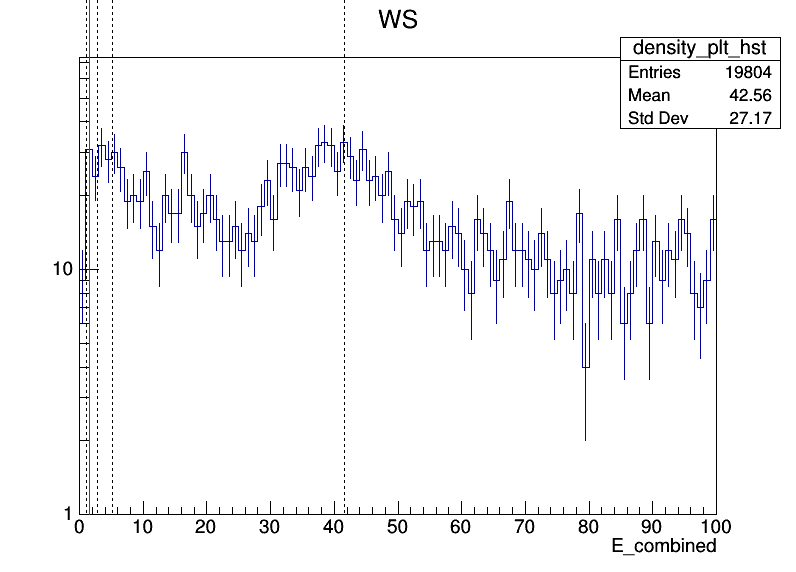

In [20]:
g1=0.12
g2=16

au = 3.3  #use 3.10 for 2 sigma bounds #90% 3.007
bu = -0.1158 
    
al = 2.95; # use 2.592 #90% 2.682
bl =-0.1197;

er_cut_l=TCut('log10(s2area/spikyS1)>{:g}*spikyS1^{:g}'.format(al,bl))
er_cut_u=TCut('log10(s2area/spikyS1)<{:g}*spikyS1^{:g}'.format(au,bu))

fid_vol=TCut('drift>30 && drift<290 && radius<50') #add time cut ... 'luxstamp/10**15 ...&& luxstamp/10**15<8.5
area_cut=TCut('s1area>0 && s1area<10**6 && s2area_raw>150 && s2area>200 && s2area<10**6') #spikyS1
bad_area_cut=TCut('((goodArea<=630 && badArea < 80) || (goodArea>630 && badArea < 80+0.095*(goodArea-630)))')
ercut= er_cut_l.GetTitle() + '&&' + er_cut_u.GetTitle()
#energy_cut=TCut('1/73*(spikyS1/{:g}+s2area/{:g})'.format(g1,g2)+'<4 &&1/73*(spikyS1/{:g}+s2area/{:g})'.format(g1,g2)+'>1.5' )
combined_cut=TCut(fid_vol.GetTitle() + '&&'+ area_cut.GetTitle() + '&&' + bad_area_cut.GetTitle() );

density_plt_hst=TH1F('density_plt_hst','WS;E_combined',100,0,100)
n=chain.Draw('1/73*(s1area/{:g}+s2area/{:g})>>density_plt_hst'.format(g1,g2),combined_cut) # WS is chain2 #  Cs is chain3
density_plt_hst.SetOption("EH")

aline=[]
Energies=[1.1,2.8,5.2,41.55] 

for ii, En in enumerate(Energies):
    aline.append(TLine(En,0,En,360))
    aline[ii].SetLineStyle(2)
    aline[ii].SetLineColor(1) #black =1
    aline[ii].Draw()

Thresh=TLine(1.5,0,1.5,360)#energy threshold
Thresh.SetLineColor(2)
Thresh.Draw()
'''
amps=[]
means=[]
sigmas=[]
Texts=[]

density_plt_hst.Fit("gaus","","",cutsE[2,0],cutsE[2,1]);
amps.append(density_plt_hst.GetFunction("gaus").GetParameter(0) )
means.append(density_plt_hst.GetFunction("gaus").GetParameter(1) )
sigmas.append(density_plt_hst.GetFunction("gaus").GetParameter(2) )

density_plt_hst.Fit("gaus","","",cutsE[1,0],cutsE[1,1]);
amps.append(density_plt_hst.GetFunction("gaus").GetParameter(0) )
means.append(density_plt_hst.GetFunction("gaus").GetParameter(1) )
sigmas.append(density_plt_hst.GetFunction("gaus").GetParameter(2) )

Fit1=TF1("g1","gauss",cutsE[0,0],cutsE[0,1])
Fit2=TF1("g2","gaus",cutsE[1,0],cutsE[1,1])
#total = TF1("total","gaus(0)+gaus(1)",1,8)
#total.SetLineColor(2)
                   
density_plt_hst.Fit(Fit1,"R");
density_plt_hst.Fit(Fit2,"R+");   
par=Fit1.GetParameters();
par2=Fit2.GetParameters();

par[3]=par2[0]
par[4]=par2[1]
par[5]=par2[2]
#par_tot=array([par[0],par[1],par[2],par2[0],par2[1],par2[2]])

#total.SetParameters(par);
#density_plt_hst.Fit(total,"R+");
'''

amps=array(amps)
means=array(means)
sigmas=array(sigmas)

for ii, mu in enumerate(means):
    Texts.append(TLatex(mu,amps[ii]*0.6,'#splitline{{#mu={:1.3g}}}{{#sigma={:1.2g}}}'.format(means[ii],sigmas[ii]) ))
    Texts[ii].SetTextSize(0.03)
    Texts[ii].Draw()

    
#density_plt_hst.Fit("gaus","","",cutsE[2,0],cutsE[2,1]);
#density_plt_hst.Fit("gaus","+","",3.8,6.5);

gStyle.SetOptFit(0) # superimpose fit results


c3.SetLogy()

c3

<h1> Get luxstamps </h1>

In [159]:
energy_cut=TCut('1/73*(spikyS1/{:g}+s2area/{:g})>{:g} && 1/73*(spikyS1/{:g}+s2area/{:g})<{:g}'
               .format(g1,g2,2.2,g1,g2,3.2))

n=chain.Draw('luxstamp',combined_cut+energy_cut+kr_time_cut_all) #s1area


In [160]:
n

132L

In [161]:
stamps= ndarray( (n,),dtype= float64, buffer=chain.GetV1())
for ii in range(0,stamps.size):
    print("{:.0f},".format(stamps[ii]))

7297012359864954,
7301100867255992,
7310323903267449,
7312893952030765,
7318831602676453,
7321306442726151,
7344633095839987,
7346205353617816,
7346298214691595,
7346477159525679,
7348804974050122,
7359347954500388,
7376265591306356,
7379074379166420,
7381711645110864,
7401546586000088,
7403047604628729,
7442731413268907,
7443842762144963,
7444592063419889,
7446506820903474,
7447511547279118,
7464414445567772,
7468384861409497,
7496178778064000,
7500059842872578,
7525501900497400,
7530538978239391,
7556741985702982,
7561791358650022,
7562846947775242,
7563858960804691,
7565326964459814,
7566445980642502,
7592365653601017,
7593434564837476,
7595135195398816,
7595451373702899,
7595460451624357,
7596653011201861,
7597286009729853,
7597372267770815,
7597735304663132,
7599536352054092,
7604468469918760,
7606803615681443,
7609719804457061,
7622242338619161,
7622313300390636,
7622546839272179,
7653237550564493,
7654116165448917,
7654431753022224,
7657634961291338,
7659155997600341,
7661820389

In [ ]:
#c3.Clear()

In [25]:
c3 = rootnotes.default_canvas(name='3keV')

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: density_plt_hst2 (Potential memory leak).


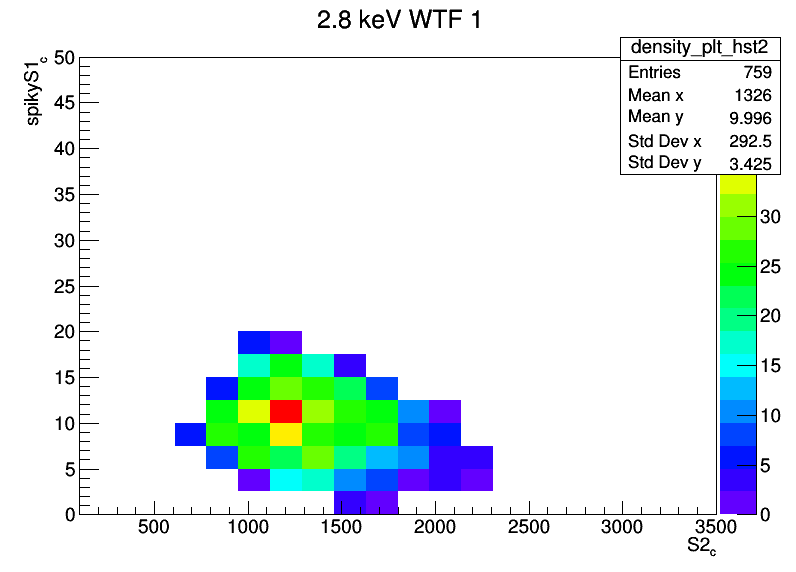

In [22]:
#chain.SetMarkerStyle(7)
#chain.SetMarkerSize(10)
#setup s2 vs s2 hist to get LY,QY
density_plt_hst2=TH2F('density_plt_hst2','2.8 keV WTF 1;S2_{c};spikyS1_{c}',20,100,3500,20,0,50)
energy_cut=TCut('1/73*(spikyS1/{:g}+s2area/{:g})>{:g} && 1/73*(spikyS1/{:g}+s2area/{:g})<{:g}'
               .format(g1,g2,cutsE[0,0],g1,g2,cutsE[0,1]))


n=chain.Draw('spikyS1:s2area>>density_plt_hst2',combined_cut+energy_cut,'colz') #s1area

c3

In [23]:
s1 = ndarray( (n,),dtype= float64, buffer=chain.GetV1())
s2 = ndarray( (n,),dtype= float64, buffer=chain.GetV2())


In [24]:
s1.size

759

In [25]:
H, xedges, yedges = histogram2d(s2, s1, bins=7, range=None, normed=False)
H=H.T
x_bin_center=(xedges[:-1]+xedges[1:])/2
y_bin_center=(yedges[:-1]+yedges[1:])/2

initial_guess = (H.max(), mean(s2), mean(s1), std(s2), std(s1),0,0)
x, y = np.meshgrid(x_bin_center, y_bin_center)

popt, pcov = opt.curve_fit(twoD_Gaussian, (x, y), H.ravel(), p0=initial_guess)

mean_s2[0]=popt[1]
mean_s2_sig[0]=sqrt(pcov[1,1])
mean_s1[0]=popt[2]
mean_s1_sig[0]=sqrt(pcov[2,2])



In [ ]:
savetxt('Run03_Golden_Doke/fits/3keVfit.txt', popt, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ')
savetxt('Run03_Golden_Doke/fits/3keVcov.txt', pcov, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ')

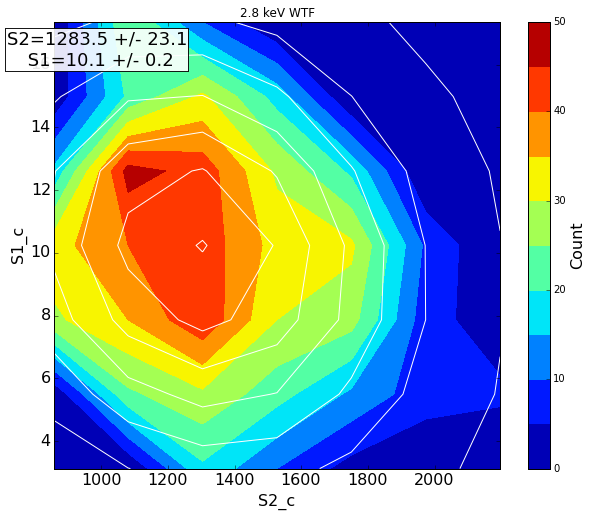

In [26]:
data_fitted = twoD_Gaussian((x, y), *popt)
figure
fig, ax = plt.subplots(1,1)
ax.hold(True)
#ax.imshow(H.reshape(x.shape), cmap=plt.cm.jet, origin='bottom',
#    extent=(x.min(), x.max(), y.min(), y.max()))
plt.contourf(x_bin_center,y_bin_center,H,10)
ax.contour(x, y, data_fitted.reshape(x.shape), 7, colors='w')
plt.xlabel('S2_c',fontsize=16)
plt.ylabel('S1_c',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cb=plt.colorbar()
cb.set_label('Count',fontsize=16)
plt.text(x.min()*1.15,y.max()*.95,'S2={:1.1f} +/- {:1.1f} \n S1={:1.1f} +/- {:1.1f}'.format(popt[1],sqrt(pcov[1,1]),popt[2],sqrt(pcov[2,2])),
         horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor='w', alpha=0.9),fontsize=18)
plt.title('2.8 keV WTF')
#savefig('Run03_Golden_Doke/5keV_fit.pdf')

<h1> Check the R vs Z distribuation of the 2.8 keV events </h1>

In [27]:
#c4.Clear()
c4 = rootnotes.default_canvas(name='Ar_RZ')

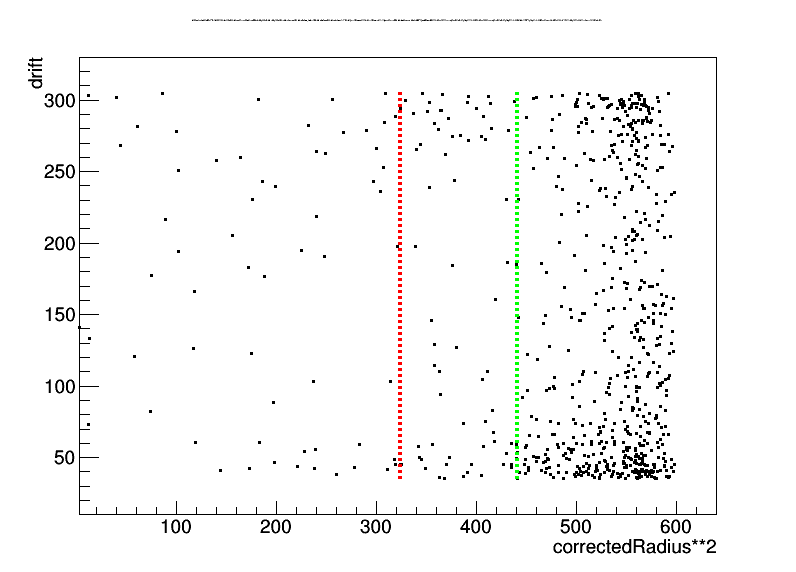

In [28]:
chain.SetMarkerStyle(7)
chain.SetMarkerSize(10)
#density_plt_hst=TH2F('density_plt_hst','5.2 keV x-ray 1;S2_{c};spikyS1_{c}',20,500,3500,20,1,50)
#density_plt_hst.Draw()
chain.Draw('drift:correctedRadius**2',combined_cut+energy_cut) #s1area

linR18=TLine(18**2,35.5,18**2,305)
linR18.SetLineColor(2)
linR18.SetLineStyle(2)
linR18.SetLineWidth(4)
linR18.Draw()

linR21=TLine(21**2,35.5,21**2,305)
linR21.SetLineColor(3)
linR21.SetLineStyle(2)
linR21.SetLineWidth(4)
linR21.Draw()
c4

In [29]:
c5 = rootnotes.default_canvas(name='Ar_XY')

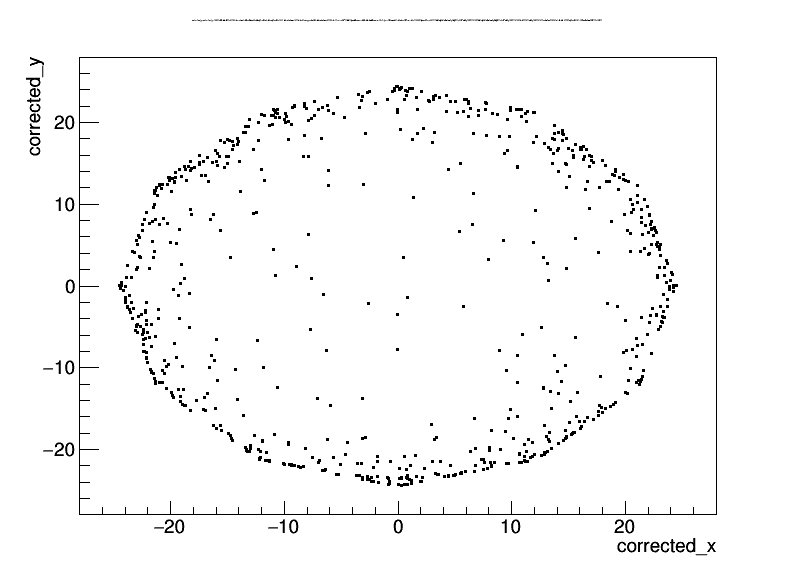

In [31]:
chain.SetMarkerStyle(7)
chain.SetMarkerSize(10)
#density_plt_hst=TH2F('density_plt_hst','5.2 keV x-ray 1;S2_{c};spikyS1_{c}',20,500,3500,20,1,50)
#density_plt_hst.Draw()
chain.Draw('corrected_y:corrected_x',combined_cut+energy_cut) #s1area

c5